In [1]:
import mphot

In [2]:
instrument_efficiency_path = '../resources/systems/speculoos_Andor_iKon-L-936_-60.csv' # index in microns, efficiency of telescope+instrument as fraction
filter_path = '../resources/filters/I+z.csv' # index in microns, filter efficiency as fraction

name, system_response = mphot.generate_system_response(instrument_efficiency_path, filter_path)

`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

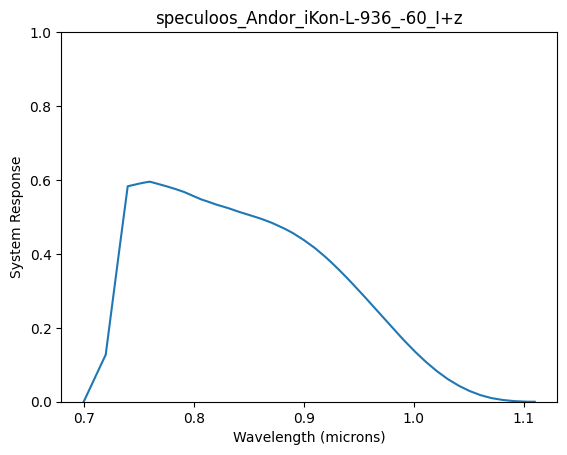

In [3]:
system_response.plot(xlabel='Wavelength (microns)', ylabel='System Response', title=name, ylim=(0, 1))

In [4]:
# sky properties
props_sky = {
    "pwv" : 2.5,        # PWV [mm]
    "airmass" : 1.1,    # airmass
    "seeing" : 1.35     # seeing (==FWHM) ["]
}

# instrument properties
props_instrument = {
    "name" : name,          # name to get SR/precision grid from file
    "plate_scale" : 0.35,   # pixel plate scale ["]
    "N_dc" : 0.2,           # dark current [e/pix/s]
    "N_rn" : 6.328,         # read noise [e_rms/pix]
    "well_depth" : 64000,   # well depth [e/pix]
    "well_fill" : 0.7,      # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time" : 10.5,     # read time between images [s]
    "r0" : 0.5,             # radius of telescope's primary mirror [m]
    "r1" : 0.14,            # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 2566       # [K]
distance = 12.5   # [pc]


In [13]:
# get the precision and components used to calculate it (generates grid if not already present)
result = mphot.get_precision(props_instrument, props_sky, Teff, distance)

mphot.display_results(result)

,single frame [ppt],10 minute binned [ppt]
,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_Andor_iKon-L-936_-60_I+z
All,1.50,0.537
Star,1.14,0.409
Scintillation,0.516,0.184
Sky,0.802,0.286
Dark current,0.0977,0.0349
Read noise,0.170,0.0608


,speculoos_Andor_iKon-L-936_-60_I+z
Teff [K],2.57e+3
distance [pc],12.5
N_star [e/s],1.16e+4
star_flux [e/m2/s],1.77e+4
scn [e_rms],394
pixels in aperture [pix],421
ap_radius [pix],11.6
N_sky [e/pix/s],13.5
sky_radiance [e/m2/arcsec2/s],152
seeing [arcsec],1.35


,speculoos_Andor_iKon-L-936_-60_I+z
star [mag],13.7
sky [mag/arcsec2],18.8
vega_flux [e/s],3.64e+9


In [26]:
# extract data
image_precision, binned_precision, components = result

In [27]:
image_precision # precision budget as fraction, x1000 for ppt

{'All': np.float64(0.0018594013224931464),
 'Star': np.float64(0.0015193997816438612),
 'Scintillation': np.float64(0.0006850773409832677),
 'Sky': np.float64(0.0007880245951457461),
 'Dark current': np.float64(9.605090685296679e-05),
 'Read noise': np.float64(0.00022194161222999516)}

In [28]:
binned_precision # precision budget as fraction, x1000 for ppt

{'All': np.float64(0.0005259167624883394),
 'Star': np.float64(0.00042975005149302546),
 'Scintillation': np.float64(0.0001937686355632719),
 'Sky': np.float64(0.00022288644136519523),
 'Dark current': np.float64(2.7167229234003913e-05),
 'Read noise': np.float64(6.277440633899071e-05)}

In [29]:
components # dictionary of components from calculation

{'name': 'andorSPC_-60_I+z',
 'Teff [K]': 2566,
 'distance [pc]': 12.5,
 'N_star [e/s]': np.float64(11551.209732244162),
 'star_flux [e/m2/s]': np.float64(17667.026959303585),
 'scn [e_rms]': np.float64(296.75325008140226),
 'npix': 230.81088883516844,
 'ap_radius [pix]': 8.571428571428571,
 'N_sky [e/pix/s]': np.float64(13.461907485031265),
 'sky_radiance [e/m2/arcsec2/s]': np.float64(151.82320859470744),
 'seeing [arcsec]': 1,
 'pwv [mm]': 2.5,
 'airmass': 1.1,
 'plate_scale ["/pix]': 0.35,
 'N_dc [e/pix/s]': 0.2,
 'N_rn [e_rms/pix]': 6.328,
 'A [m2]': 0.7238229473870883,
 'r0 [m]': 0.5,
 'r1 [m]': 0.14,
 't [s]': np.float64(37.49975336520353),
 'well_depth [e/pix]': 64000,
 'well_fill': 0.7,
 'binning [mins]': 10,
 'read_time [s]': 10.5,
 'nImages': np.float64(12.500064228141598)}

In [30]:
# extract exposure time
exposure_time = components['t [s]']
exposure_time

np.float64(37.49975336520353)